<a href="https://colab.research.google.com/github/udaybhaskar717/GNR-638/blob/main/213170007_Assignmnet_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [134]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, log_loss
from tqdm import tqdm_notebook 
import tqdm
import seaborn as sns
import imageio
from IPython.display import HTML


from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_blobs

In [135]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","yellow","green"])

In [136]:
np.random.seed(0)

In [137]:
data, labels = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=0)
print(data.shape, labels.shape)

(1000, 2) (1000,)


In [138]:
X_train, X_val, Y_train, Y_val = train_test_split(data, labels, stratify=labels, random_state=0)
print(X_train.shape, X_val.shape, labels.shape)

(750, 2) (250, 2) (1000,)


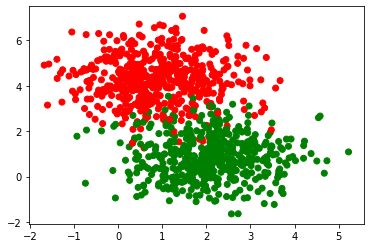

In [139]:
plt.scatter(data[:,0], data[:,1], c=labels, cmap=my_cmap)
plt.show()

In [140]:
enc = OneHotEncoder()
# 0 -> (1, 0, 0, 0), 1 -> (0, 1, 0, 0), 2 -> (0, 0, 1, 0), 3 -> (0, 0, 0, 1)
y_OH_train = enc.fit_transform(np.expand_dims(Y_train,1)).toarray()
y_OH_val = enc.fit_transform(np.expand_dims(Y_val,1)).toarray()

In [149]:
class net:
    def __init__(self):
        self.w1=np.random.rand()
        self.w2=np.random.rand()
        self.w3=np.random.rand()
        self.w4=np.random.rand()
        self.w5=np.random.rand()
        self.w6=np.random.rand()
        self.w7=np.random.rand()
        self.w8=np.random.rand()
        self.b1=0
        self.b2=0
        self.b3=0
        self.b4=0
    def tanh(self,x):
        return np.tanh(x)
    def forward_pass(self,x):
        self.x1,self.x2=x
        self.a1 = self.w1*self.x1+self.w2*self.x2++self.b1
        self.h1 = self.tanh(self.a1)
        self.a2 = self.w3*self.x1+self.w4*self.x2++self.b2
        self.h2 = self.tanh(self.a2)
        self.a3 = self.w5*self.h1+self.w6*self.h2++self.b3
        self.h3 = self.tanh(self.a3)
        self.a4 = self.w7*self.h1+self.w8*self.h2++self.b4
        self.h4 = self.tanh(self.a4)
        return np.array([self.h3,self.h4])
    def grad(self,x,y):
        self.forward_pass(x)
        self.y1,self.y2 =y
        self.da3 = (self.h3-self.y1)*(self.h3*(1-self.h3)+1)
        self.da4 = (self.h4-self.y2)*(self.h4*(1-self.h4)+1)

        self.dw5 = self.da3 * self.h1
        self.dw6 = self.da3 * self.h2
        self.db3 = self.da3

        self.dw7 = self.da4 * self.h1
        self.dw8 = self.da4 * self.h2
        self.db4 = self.da4

        self.da1 = (1-self.h1**2) * (self.da3*self.w5 + self.da4*self.w7)
        self.da2 = (1-self.h2**2) * (self.da3*self.w6 + self.da4*self.w8)

        self.dw1 = self.da1*self.x1
        self.dw2 = self.da1*self.x2
        self.db1 = self.da1

        self.dw3 = self.da2*self.x1
        self.dw4 = self.da2*self.x2
        self.db2 = self.da2

    def fit(self,X,Y,epochs=1,learning_rate=1,display_loss=False):
        if display_loss:
            loss={}
        
        for i in tqdm.notebook.tqdm(range(epochs),total=epochs,unit='epoch'):
            dw1,dw2,dw3,dw4,dw5,dw6,dw7,dw8,db1,db2,db3,db4 =[0]*12
            for x,y in zip(X,Y):
                self.grad(x,y)
                dw1+=self.dw1
                dw2+=self.dw2
                dw3+=self.dw3
                dw4+=self.dw4
                dw5+=self.dw5
                dw6+=self.dw6
                dw7+=self.dw7
                dw8+=self.dw8
                db1+=self.db1
                db2+=self.db2
                db3+=self.db3
                db4+=self.db4
            m=X.shape[0]
            self.w1 -= learning_rate * dw1/m
            self.w2 -= learning_rate * dw2/m
            self.w3 -= learning_rate * dw3/m
            self.w4 -= learning_rate * dw4/m
            self.w5 -= learning_rate * dw5/m
            self.w6 -= learning_rate * dw6/m
            self.w7 -= learning_rate * dw7/m
            self.w8 -= learning_rate * dw8/m
            self.b1 -= learning_rate * db1/m
            self.b2 -= learning_rate * db2/m
            self.b3 -= learning_rate * db3/m
            self.b4 -= learning_rate * db4/m
            if display_loss:
                Y_pred = self.predict(X)
                loss[i] = mean_squared_error(Y_pred,Y)+log_loss(np.argmax(Y,axis=1),Y_pred)
        if display_loss:
            plt.plot(list(loss.values()))
            plt.show()
    def predict(self,X):
        Y_pred = []
        for x in X:
            y_pred = self.forward_pass(x)
            Y_pred.append(y_pred)
        return np.array(Y_pred)

  0%|          | 0/3000 [00:00<?, ?epoch/s]

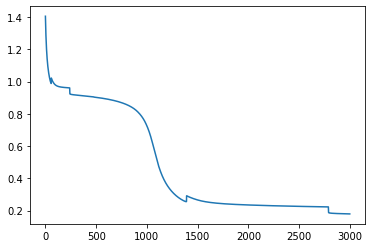

In [150]:
model = net()
model.fit(X_train,y_OH_train,epochs=3000,learning_rate=0.01,display_loss=True)

In [151]:
y_pred_=model.predict(X_val)
Y_pred_val = np.argmax(y_pred_,1)

In [152]:
print("validation accuracy ",accuracy_score(Y_pred_val,Y_val))

validation accuracy  0.936


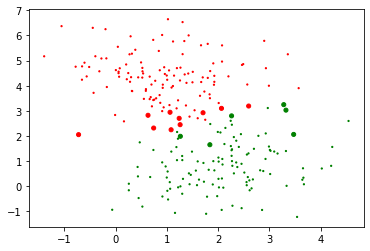

In [153]:
plt.scatter(X_val[:,0], X_val[:,1], c=Y_pred_val, cmap=my_cmap, s=15*(np.abs(np.sign(Y_pred_val-Y_val))+.1))
plt.show()